# Bin profiles

## Import packages

## Import fetch data notebook

In [1]:
fetch_data_notebook = 'lmm_fetch_data.ipynb'

%run {fetch_data_notebook}

plot_data_notebook = 'lmm_plot_data.ipynb'

%run {plot_data_notebook}



## Import data binning notebook

In [2]:
data_binner_notebook = 'lmm_data_binner.ipynb'

%run {data_binner_notebook}

## Retrieve data from Argovis

In [3]:
start_date = '2020-1-01'
end_date = '2020-01-03'
pressure_range = '[0,500]'
region = 'atlantic_coords'
argo_source = 'argo_core'

fetch_obj = ArgovisDataImporter(start_date, end_date, pressure_range, source=argo_source, region=region)

df = fetch_obj.get_cleaned_profile()

len(df)

https://argovis.colorado.edu/selection/profiles?startDate=2020-1-01&endDate=2020-01-03&source=argo_core&shape=[[[-40.078125,29.840644],[-33.368671,30.338837],[-26.614528,30.492027],[-19.863281,30.297018],[-20.039063,-30.145127],[-26.724822,-30.384017],[-33.419918,-30.281826],[-40.078125,-29.840644],[-40.078125,29.840644]]]&presRange=[0,500]


11618

In [4]:
df.head()

,pres,psal,temp,cycle_number,profile_id,lat,lon,date,psal_qc,temp_qc,pres_qc,year,month,day
0,0.2,35.845,24.119,5.0,3902149_5D,-29.98372,-25.03967,2020-01-02T21:38:56.002Z,NaN,NaN,NaN,2020,1,2
1,1.4,35.845,24.116,5.0,3902149_5D,-29.98372,-25.03967,2020-01-02T21:38:56.002Z,NaN,NaN,NaN,2020,1,2
2,2.5,35.845,24.114,5.0,3902149_5D,-29.98372,-25.03967,2020-01-02T21:38:56.002Z,NaN,NaN,NaN,2020,1,2
3,3.4,35.845,24.113,5.0,3902149_5D,-29.98372,-25.03967,2020-01-02T21:38:56.002Z,NaN,NaN,NaN,2020,1,2
4,4.3,35.845,24.112,5.0,3902149_5D,-29.98372,-25.03967,2020-01-02T21:38:56.002Z,NaN,NaN,NaN,2020,1,2


## Create xarray dataset binned on pressure


In [5]:
pressure_range = [0,500]
pressure_bin_size = 10

binner_obj = DataBinner(df, pressure_range, pressure_bin_size)

ds_all = binner_obj.create_xarray()

### Look at dataset created

In [6]:
print(ds_all)
print(list(ds_all.coords))
print(list(ds_all.keys()))


<xarray.Dataset>
Dimensions:       (pres: 2742)
Coordinates:
  * pres          (pres) float64 5.0 15.0 25.0 35.0 ... 455.0 465.0 475.0 485.0
    cycle_number  (pres) float64 162.0 162.0 162.0 162.0 ... 26.0 26.0 26.0 26.0
    profile_id    (pres) <U12 '1901731_162' '1901731_162' ... '7900561_26'
    lat           (pres) float64 9.201 9.201 9.201 9.201 ... 17.46 17.46 17.46
    lon           (pres) float64 -37.73 -37.73 -37.73 ... -20.94 -20.94 -20.94
    date          (pres) <U24 '2020-01-01T09:14:34.000Z' ... '2020-01-02T07:2...
    year          (pres) int64 2020 2020 2020 2020 2020 ... 2020 2020 2020 2020
    month         (pres) int64 1 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1
    day           (pres) int64 1 1 1 1 1 1 1 1 1 1 1 1 ... 2 2 2 2 2 2 2 2 2 2 2
Data variables:
    temp          (pres) float64 26.67 26.68 26.68 26.69 ... 10.44 10.28 10.2
    psal          (pres) float64 36.22 36.22 36.22 36.22 ... 35.26 35.24 35.23
    unique_id     (pres) <U37 '1901731_162_2020-0

## Save dataset to netcdf

Since limited on the number of data to download, consider saving to files and then combining when reading them all in

In [7]:
ds_all.to_netcdf('temp_psal_dataset.nc')

## Example queries

### Select all values where day = 2

In [8]:
a = ds_all.where(ds_all.day == 2, drop=True)
print(a)

<xarray.Dataset>
Dimensions:       (pres: 1350)
Coordinates:
  * pres          (pres) float64 5.0 15.0 25.0 35.0 ... 455.0 465.0 475.0 485.0
    cycle_number  (pres) float64 304.0 304.0 304.0 304.0 ... 26.0 26.0 26.0 26.0
    profile_id    (pres) <U12 '1902184_304' '1902184_304' ... '7900561_26'
    lat           (pres) float64 19.45 19.45 19.45 19.45 ... 17.46 17.46 17.46
    lon           (pres) float64 -30.36 -30.36 -30.36 ... -20.94 -20.94 -20.94
    date          (pres) <U24 '2020-01-02T11:45:39.001Z' ... '2020-01-02T07:2...
    year          (pres) int64 2020 2020 2020 2020 2020 ... 2020 2020 2020 2020
    month         (pres) int64 1 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1
    day           (pres) int64 2 2 2 2 2 2 2 2 2 2 2 2 ... 2 2 2 2 2 2 2 2 2 2 2
Data variables:
    temp          (pres) float64 23.31 23.31 23.31 23.31 ... 10.44 10.28 10.2
    psal          (pres) float64 nan nan nan nan nan ... 35.27 35.26 35.24 35.23
    unique_id     (pres) object '1902184_304_20

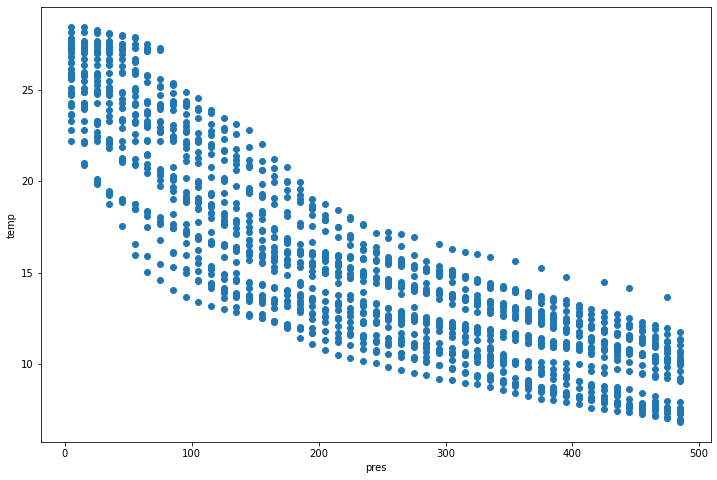

In [9]:
xr.plot.scatter(a,'pres', 'temp', size=8)

In [10]:
ds_all_grouped = binner_obj.bin_on_time(ds_all, 'day')

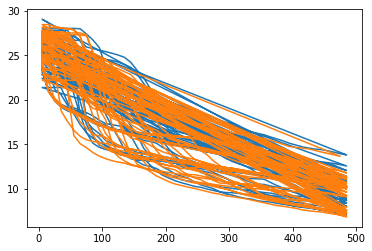

In [11]:

for name, group in ds_all_grouped:
    pres = group['pres'].values
    temp = group['temp'].data
    psal = group['psal'].data
    plt.plot(pres,temp)
